Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np


Loading the Dataset



In [3]:
data = pd.read_csv('/content/house_price.csv')

Displaying first few rows

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Checking for Missing Values

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Importing the Dependencies

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Training and Testing DataSet

In [6]:
# Define the features and target variable
X = data[['sqft_living', 'bedrooms'] + [col for col in data.columns if 'city_' in col or 'street_' in col]]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize models

In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}


Storing the performance of each model

In [8]:
model_performance = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the performance metrics
    model_performance[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }


Evaluating the models

In [9]:
performance_data = pd.DataFrame(model_performance).T
print(performance_data)


                                       MAE           MSE        R2
Linear Regression            223920.216270  9.910705e+11  0.028216
Decision Tree Regression     249137.226332  1.036981e+12 -0.016801
Random Forest Regression     239163.925452  1.016719e+12  0.003067
Gradient Boosting Regressor  223701.184280  1.010932e+12  0.008741


 Visualizing the performance

Importing the Dependencies

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

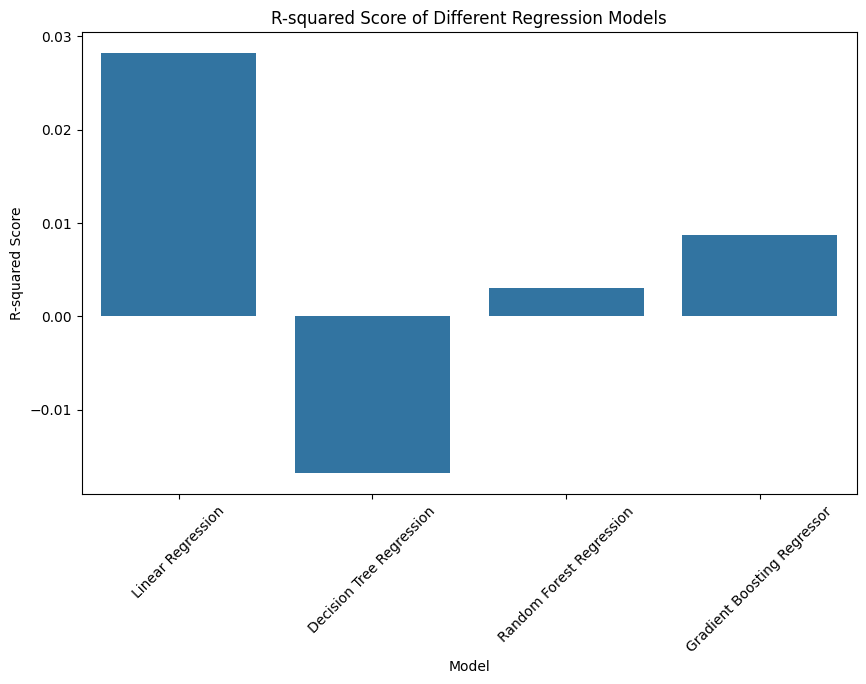

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_data.index, y=performance_data['R2'])
plt.title('R-squared Score of Different Regression Models')
plt.ylabel('R-squared Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()